In [0]:
!mkdir graphs

<img src="https://i.imgur.com/Ist45yG.png" style="width:700px;">

# **Instalar librerías**

In [1]:
!pip install python-igraph
!pip install cairocffi

  Using cached https://files.pythonhosted.org/packages/0f/a0/4e7134f803737aa6eebb4e5250565ace0e2599659e22be7f7eba520ff017/python-igraph-0.7.1.post6.tar.gz
  Stored in directory: /root/.cache/pip/wheels/41/d6/02/34eebae97e25f5b87d60f4c0687e00523e3f244fa41bc3f4a7
Successfully built python-igraph
     |████████████████████████████████| 92kB 26.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/3a/2e/92/89e9dcce600a1a78bebe571fdd096669cba354b29c5e1140b9
Successfully built cairocffi


# **Importar librerías**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
from google.colab import files
src = list(files.upload().values())[0]
open('utils_notebook.py','wb').write(src)

Saving utils_notebook.py to utils_notebook.py


In [0]:
import numpy as np
from utils_notebook import *
%matplotlib inline
import pandas as pd
from sklearn.datasets import *
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Leer el *path* al dataset

Leemos el dataset como un Pandas Dataframe para analizar los datos.

In [4]:
path = '/content/gdrive/My Drive/Networks/dataset/com-youtube.ungraph.txt'
data = pd.read_csv(path, sep='\t', skiprows=3)
print("Hay", data.to_numpy().shape[0], "conexiones en el dataset de youtube")
data.head()

('Hay', 2987624, 'conexiones en el dataset de youtube')


# FromNodeId  ToNodeId
0             1         2
1             1         3
2             1         4
3             1         5
4             1         6

In [5]:
data.describe()

# FromNodeId      ToNodeId
count  2.987624e+06  2.987624e+06
mean   1.875488e+05  4.128765e+05
std    2.608200e+05  3.392837e+05
min    1.000000e+00  2.000000e+00
25%    1.181500e+04  1.093080e+05
50%    7.680000e+04  3.070595e+05
75%    2.342970e+05  6.864020e+05
max    1.157804e+06  1.157827e+06

Observamos que el dataset consta de dos columnas que nos indica las conexiones entre nodos. Además nos damos cuenta que hay 2987624 conexiones. Es preciso aclarar que debido a la cantidad de datos para entrenar los algoritmos, estos pueden presentar demoras.

# Tratamiento de datos

Convertimos el dataframe a un Ndarray de numpy para pasar estos datos a los algoritmos.

In [0]:
np_data = data.to_numpy()

## K-Means and how it works

El algoritmo KMeans agrupa datos tratandolos de separar en *n* grupos de igual varianza, minimizando un criterio conocido como la inercia.

- **Agrupando los puntos en K clusters mutuamente exlusivos.**

<img src="https://media.giphy.com/media/3NKUcoyBzkXQc/giphy.gif" style="width:300px;">

- **Cómo funciona?**


1. Inicializar $K$ centroides $C = \{c_1, c_2, \ldots c_k\}$
    - Los centroides son vectores del mismo tamaño $c_i \in \mathbb{R}^{F}$
2. Cada punto es clasificado mediante el calculo de la distancia entre el mismo punto y cada centroide.
    - $\arg \min_{c_i \in C} dist(c_i, x)^{2}$
3. Basado en los puntos de clasificación, recalculamos el centro del grupo tomando la media de todos los vectores de ese grupo.
    -$c_i = \frac{1}{|c_i|}\sum_{x_i \in c_i} x_i$

4. Repetir los pasos durante un numero de iteraciones o hasta que los centroides no cambien mucho entre iteraciones.

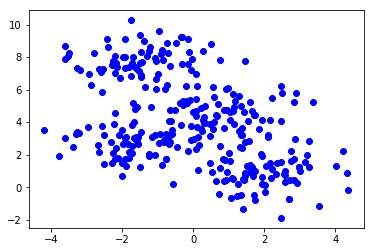

In [7]:
X, y = make_blobs(n_samples=300, centers=4, n_features=2,random_state=0)
plt.scatter(X[:,0], X[:,1], c="blue", cmap='rainbow');

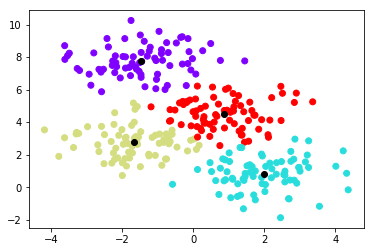

In [8]:
kmeans = KMeans(n_clusters=4)  
kmeans.fit(X)
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black') 

# Entrenar el modelo y ver datos

In [9]:
kmeans_data = np_data[:1000]
kmeans = KMeans(n_clusters=7)
train_model(kmeans, kmeans_data)

('Number of labels:', 7)


Number of labels: 7
...


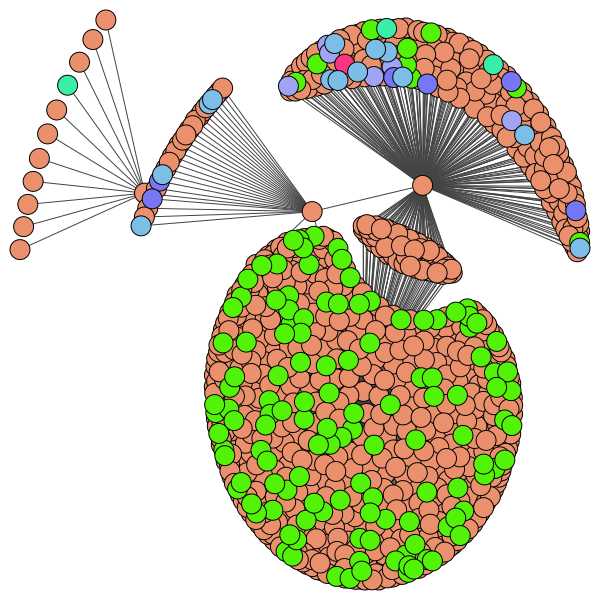

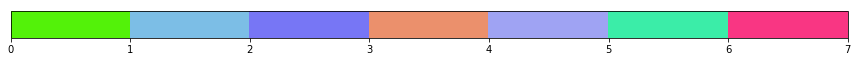

In [12]:
n_labels = len(np.unique(kmeans.labels_))
colors_kmeans = rand_cmap(n_labels, first_color_black=False)
cdict = get_color_dict(colors_kmeans)
print('...')
plot_graph(kmeans.labels_, kmeans_data, cdict, 'kmeans')

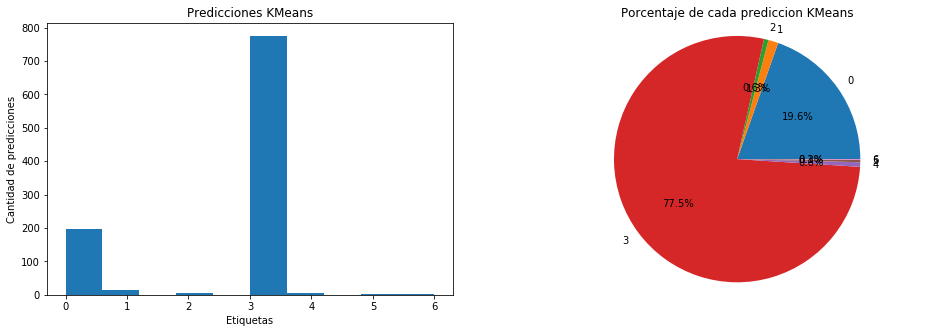

In [13]:
sizes = [100.0*np.count_nonzero(kmeans.labels_ == x)/len(kmeans.labels_) for x in np.unique(kmeans.labels_)]

fig, ax = plt.subplots(ncols=2, figsize=(16,5))

n, bins, patches = ax[0].hist(kmeans.labels_)
ax[0].set_xlabel('Etiquetas');
ax[0].set_ylabel('Cantidad de predicciones');
ax[0].set_title('Predicciones KMeans');

ax[1].pie(sizes, labels=np.unique(kmeans.labels_), autopct='%1.1f%%');
ax[1].set_title('Porcentaje de cada prediccion KMeans');
ax[1].axis('equal');

In [14]:
for label, perc in zip(np.unique(kmeans.labels_), sizes):
    print("El porcentaje para la etiqueta", label, "es del", perc)

('El porcentaje para la etiqueta', 0, 'es del', 19.6)
('El porcentaje para la etiqueta', 1, 'es del', 1.3)
('El porcentaje para la etiqueta', 2, 'es del', 0.6)
('El porcentaje para la etiqueta', 3, 'es del', 77.5)
('El porcentaje para la etiqueta', 4, 'es del', 0.6)
('El porcentaje para la etiqueta', 5, 'es del', 0.3)
('El porcentaje para la etiqueta', 6, 'es del', 0.1)
